# **Lab 05: Scale Invariant Feature Transform**

In [1]:
# Import Statements
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import cv2
import numpy as np
import matplotlib.pyplot as plt

     |████████████████████████████████| 25.0MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 148kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [0]:
# Open and read images
cameraman = cv2.imread("cameraman.tif")
face = cv2.imread("download.jpg")
football = cv2.imread("football.jpg")

## **Apply Geometric Transformation**

In [0]:
def geometric_transform(image, angle, scale):
  # Scale down image
  resized = cv2.resize(image, 
                       (int(image.shape[1] * scale), int(image.shape[0] * scale)),
                       interpolation = cv2.INTER_AREA)
  
  # Rotate image
  (h, w) = resized.shape[:2]
  (cX, cY) = (w // 2, h // 2)

  matrix = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
  cos = np.abs(matrix[0, 0])
  sin = np.abs(matrix[0, 1])

  nW = int((h * sin) + (w * cos))
  nH = int((h * cos) + (w * sin))

  matrix[0, 2] += (nW / 2) - cX
  matrix[1, 2] += (nH / 2) - cY

  rotated = cv2.warpAffine(resized, matrix, (nW, nH))
  
  # Blur image
  blur_image = cv2.GaussianBlur(rotated, (3,3), 0)

  return blur_image

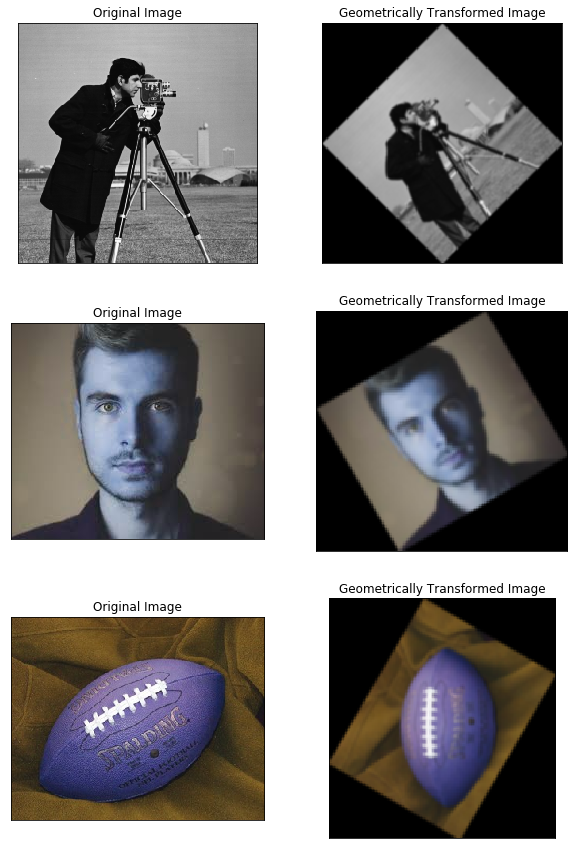

In [19]:
# Apply Geometric Transformations and Plot
fig = plt.figure(figsize=(10, 15))

fig.add_subplot(3, 2, 1, xticks=[], yticks=[])
plt.title("Original Image")
plt.imshow(cameraman)

cameraman_transformed = geometric_transform(cameraman, angle = 45, scale = 0.6)
fig.add_subplot(3, 2, 2, xticks=[], yticks=[])
plt.title("Geometrically Transformed Image")
plt.imshow(cameraman_transformed)

fig.add_subplot(3, 2, 3, xticks=[], yticks=[])
plt.title("Original Image")
plt.imshow(face)

face_transformed = geometric_transform(face, angle = 30, scale = 0.5)
fig.add_subplot(3, 2, 4, xticks=[], yticks=[])
plt.title("Geometrically Transformed Image")
plt.imshow(face_transformed)

fig.add_subplot(3, 2, 5, xticks=[], yticks=[])
plt.title("Original Image")
plt.imshow(football)

football_transformed = geometric_transform(football, angle = 60, scale = 0.4)
fig.add_subplot(3, 2, 6, xticks=[], yticks=[])
plt.title("Geometrically Transformed Image")
plt.imshow(football_transformed)

plt.show()

## **Detect SIFT Keypoints**

In [0]:
# Detect SIFT Keypoints
def sift_detect(image, flags):
  temp = image.copy()
  grayscale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  sift = cv2.xfeatures2d.SIFT_create()
  keypoints, descriptors = sift.detectAndCompute(grayscale,None)
  result = cv2.drawKeypoints(temp, keypoints, np.array([]), flags=flags)

  return result, keypoints, descriptors

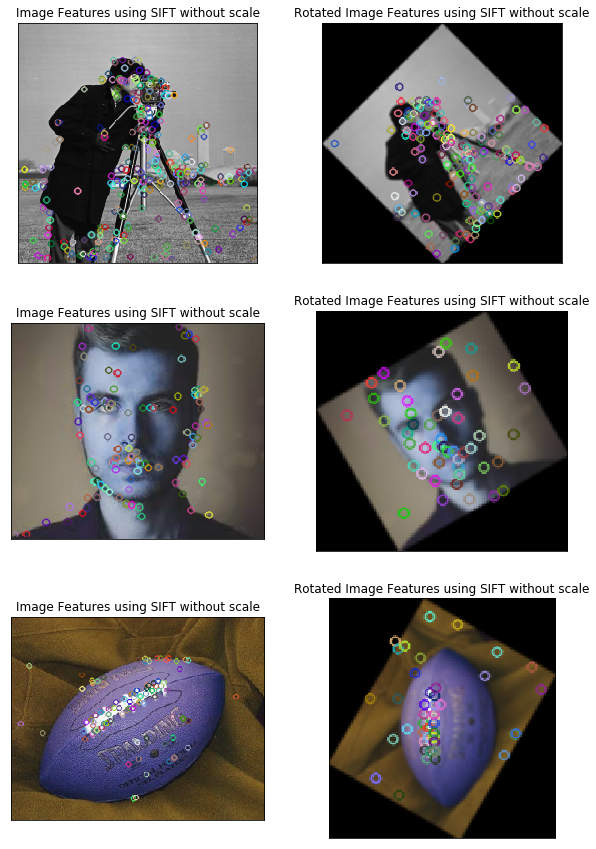

In [24]:
# Plot features without scale
fig=plt.figure(figsize=(10,15))

fig.add_subplot(3, 2, 1, xticks=[], yticks=[])
plt.title("Image Features using SIFT without scale")
sift_image, kp1, des1 = sift_detect(cameraman, cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 2, xticks=[], yticks=[])
plt.title("Rotated Image Features using SIFT without scale")
sift_image, kp2, des2 = sift_detect(cameraman_transformed, cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 3, xticks=[], yticks=[])
plt.title("Image Features using SIFT without scale")
sift_image, kp3, des3 = sift_detect(face, cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 4, xticks=[], yticks=[])
plt.title("Rotated Image Features using SIFT without scale")
sift_image, kp4, des4 = sift_detect(face_transformed, cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 5, xticks=[], yticks=[])
plt.title("Image Features using SIFT without scale")
sift_image, kp5, des5 = sift_detect(football, cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 6, xticks=[], yticks=[])
plt.title("Rotated Image Features using SIFT without scale")
sift_image, kp6, des6 = sift_detect(football_transformed, cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
plt.imshow(sift_image)
plt.show()

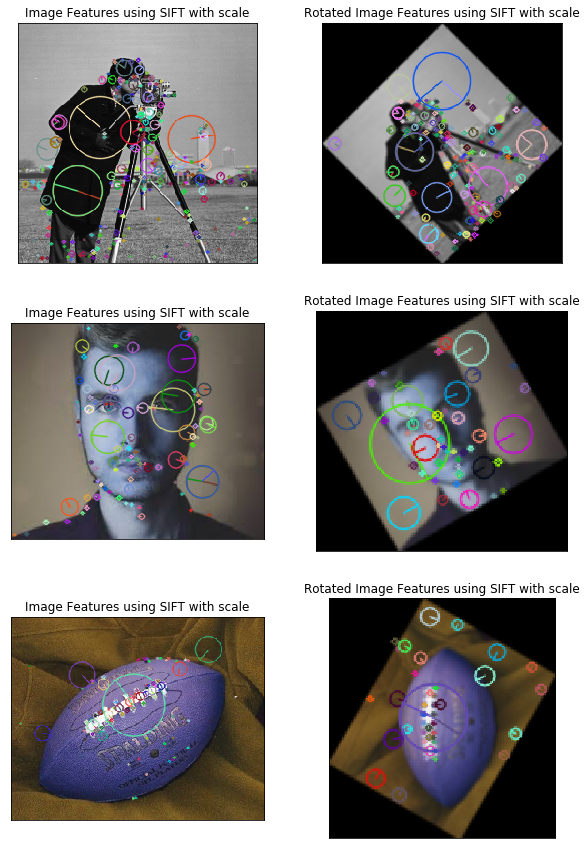

In [30]:
# Plot features with scale
fig=plt.figure(figsize=(10,15))

fig.add_subplot(3, 2, 1, xticks=[], yticks=[])
plt.title("Image Features using SIFT with scale")
sift_image, kp1, des1 = sift_detect(cameraman, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 2, xticks=[], yticks=[])
plt.title("Rotated Image Features using SIFT with scale")
sift_image, kp2, des2 = sift_detect(cameraman_transformed, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 3, xticks=[], yticks=[])
plt.title("Image Features using SIFT with scale")
sift_image, kp3, des3 = sift_detect(face, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 4, xticks=[], yticks=[])
plt.title("Rotated Image Features using SIFT with scale")
sift_image, kp4, des4 = sift_detect(face_transformed, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 5, xticks=[], yticks=[])
plt.title("Image Features using SIFT with scale")
sift_image, kp5, des5 = sift_detect(football, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_image)

fig.add_subplot(3, 2, 6, xticks=[], yticks=[])
plt.title("Rotated Image Features using SIFT with scale")
sift_image, kp6, des6 = sift_detect(football_transformed, cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(sift_image)
plt.show()

## **Image Matching**

In [0]:
# Image Matching
def image_matching(image, kp, des, image_transformed, kp_t, des_t):
  bf = cv2.BFMatcher()
  matches = bf.knnMatch(des,des_t,k=2)

  good = []
  for m,n in matches:
      if m.distance < 0.75 * n.distance:
          good.append([m])
 
  result = cv2.drawMatchesKnn(image, kp, image_transformed, kp_t, good, None, 
                            flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
  
  return result

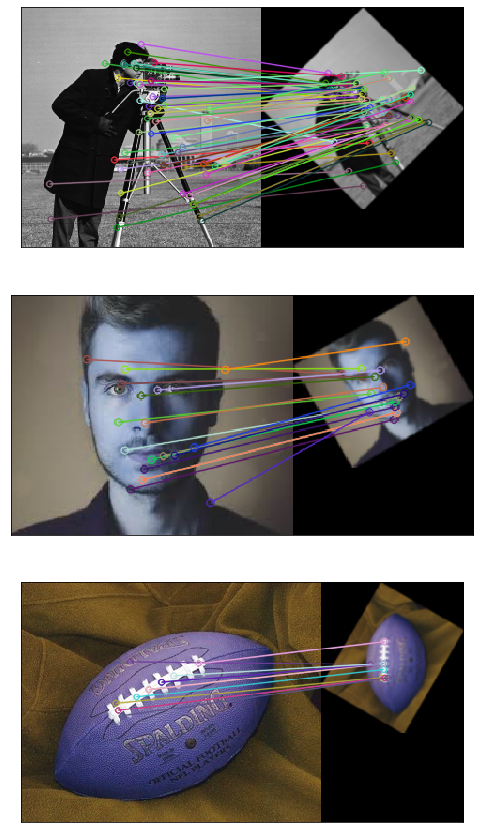

In [29]:
# Visualize Image Matching
fig=plt.figure(figsize=(10,15))

fig.add_subplot(3, 1, 1, xticks=[], yticks=[])
result = image_matching(cameraman, kp1, des1, cameraman_transformed, kp2, des2)
plt.imshow(result)

fig.add_subplot(3, 1, 2, xticks=[], yticks=[])
result = image_matching(face, kp3, des3, face_transformed, kp4, des4)
plt.imshow(result)

fig.add_subplot(3, 1, 3, xticks=[], yticks=[])
result = image_matching(football, kp5, des5, football_transformed, kp6, des6)
plt.imshow(result)
plt.show()